In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 751.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=67ac4801e172bcd1f553c07f11e1adc4d9a4780e3b505e4a90572a08be0770dd
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      S

### 데이터 다운로드

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="8Zv6K9jnOf2w4tz7CTlg")
project = rf.workspace("wonkeun-jung-rbg1y").project("ingredients-detector-tqvxr")
dataset = project.version(1).download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.

Extracting Dataset Version Zip to ingredients-detector-1 in yolov8:: 100%|██████████| 18106/18106 [00:05<00:00, 3456.59it/s]


### wandb 연동

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.7/214.7 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.2 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=28539c497c3e0c3e04e4dbf4a10a562cf83199247c7b0c74e4e52104a26f9a8b
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [ ]:
!wandb login #3bb23e348586a8dba5a3101cfaa4f989bbab7fc6

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
!cat /content/ingredients-detector-1/data.yaml

names:
- apple
- apricot
- asparagus
- avocado
- bacon
- banana
- bean
- beef
- blackberry
- blueberry
- bread
- broccoli
- butter
- cabbage
- candy
- carrot
- cashew
- cauliflower
- celery
- cheese
- chicken breast
- chicken thigh
- chicken wing
- chicken
- chili
- chilli
- chocolate
- coconut
- cookie
- corn
- cream
- cucumber
- egg
- eggplant
- fennel
- fig
- fish
- flour
- garlic
- ginger
- grape
- grapefruit
- ham
- icecream
- kiwi
- lamb
- leek
- lemon
- lettuce
- lime
- mango
- meatball
- milk
- mushroom
- noodle
- noodles
- oil
- onion
- orange
- pea
- peach
- pear
- pepper
- pineapple
- pork
- potato
- pumpkin
- radish
- rib
- rice
- salmon
- salt
- sausage
- spinach
- spring onion
- strawberry
- sugar
- sweet potato
- tofu
- tomato
- watermelon
- yogurt
- zucchini
nc: 83
roboflow:
  license: CC BY 4.0
  project: ingredients-detector-tqvxr
  url: https://universe.roboflow.com/wonkeun-jung-rbg1y/ingredients-detector-tqvxr/dataset/1
  version: 1
  workspace: wonkeun-jung-rbg1y
t

In [ ]:
!pip install PyYAML

In [ ]:
class_names = [
    'apple', 'apricot', 'asparagus', 'avocado', 'bacon', 'banana', 'bean', 'beef', 'blackberry',
    'blueberry', 'bread', 'broccoli', 'butter', 'cabbage', 'candy', 'carrot', 'cashew', 'cauliflower',
    'celery', 'cheese', 'chicken breast', 'chicken thigh', 'chicken wing', 'chicken', 'chili', 'chilli',
    'chocolate', 'coconut', 'cookie', 'corn', 'cream', 'cucumber', 'egg', 'eggplant', 'fennel', 'fig',
    'fish', 'flour', 'garlic', 'ginger', 'grape', 'grapefruit', 'ham', 'icecream', 'kiwi', 'lamb', 'leek',
    'lemon', 'lettuce', 'lime', 'mango', 'meatball', 'milk', 'mushroom', 'noodle', 'noodles', 'oil',
    'onion', 'orange', 'pea', 'peach', 'pear', 'pepper', 'pineapple', 'pork', 'potato', 'pumpkin', 'radish',
    'rib', 'rice', 'salmon', 'salt', 'sausage', 'spinach', 'spring onion', 'strawberry', 'sugar',
    'sweet potato', 'tofu', 'tomato', 'watermelon', 'yogurt', 'zucchini'
]


In [ ]:
base_path= '/content/'

In [ ]:
import yaml

test_path = base_path+'ingredients-detector-1/test'
train_path = base_path+'ingredients-detector-1/train'
val_path = base_path+'ingredients-detector-1/valid'
yaml_path = base_path+'ingredients-detector-1/data.yaml'

data = {
    'names' : class_names,
    'nc' : len(class_names),
    'test' : test_path,
    'train' : train_path,
    'val' : val_path
}


with open(yaml_path, 'w') as f:
  yaml.dump(data, f)


with open(yaml_path, 'r') as f:
  team4_yaml = yaml.safe_load(f)
  display(team4_yaml)

{'names': ['apple',
  'apricot',
  'asparagus',
  'avocado',
  'bacon',
  'banana',
  'bean',
  'beef',
  'blackberry',
  'blueberry',
  'bread',
  'broccoli',
  'butter',
  'cabbage',
  'candy',
  'carrot',
  'cashew',
  'cauliflower',
  'celery',
  'cheese',
  'chicken breast',
  'chicken thigh',
  'chicken wing',
  'chicken',
  'chili',
  'chilli',
  'chocolate',
  'coconut',
  'cookie',
  'corn',
  'cream',
  'cucumber',
  'egg',
  'eggplant',
  'fennel',
  'fig',
  'fish',
  'flour',
  'garlic',
  'ginger',
  'grape',
  'grapefruit',
  'ham',
  'icecream',
  'kiwi',
  'lamb',
  'leek',
  'lemon',
  'lettuce',
  'lime',
  'mango',
  'meatball',
  'milk',
  'mushroom',
  'noodle',
  'noodles',
  'oil',
  'onion',
  'orange',
  'pea',
  'peach',
  'pear',
  'pepper',
  'pineapple',
  'pork',
  'potato',
  'pumpkin',
  'radish',
  'rib',
  'rice',
  'salmon',
  'salt',
  'sausage',
  'spinach',
  'spring onion',
  'strawberry',
  'sugar',
  'sweet potato',
  'tofu',
  'tomato',
  'wat

### YOLO 모델 다운로드

In [ ]:
%pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.0/605.0 kB 7.7 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
supervision 0.12.0 requires pillow<9.0.0,>=8.4.0, but you have pillow 10.0.0 which is incompatible.


In [ ]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.7/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8x.pt')

100%|██████████| 131M/131M [00:02<00:00, 48.3MB/s]


 | 매개변수          | 기본값 | 설명                                                   |
|-------------------|--------|-------------------------------------------------------|
| epochs            | 30     | 훈련 에포크 수                                         |
| patience          | 10     | 조기 종료를 위한 인내 기간                             |
| batch             | 64     | 배치 크기                                             |
| imgsz             | 240    | 이미지 크기                                            |
| save              | True   | 체크포인트를 저장할지 여부                            |
| save_period       | -1     | 체크포인트 저장 주기                                    |
| cache             | False  | 데이터 로드 시 캐시 사용 여부                          |
| device            | None   | 디바이스(GPU) 선택                                     |
| workers           | 8      | 데이터 로딩을 위한 워커 수                             |
| project           | None   | 프로젝트 이름                                          |
| name              | None   | 실험 이름                                              |
| exist_ok          | False  | 저장 경로에 이미 파일이 존재하는 경우 덮어쓸지 여부   |
| pretrained        | True   | 사전 훈련된 가중치 사용 여부                          |
| optimizer         | auto   | 옵티마이저 선택                                        |
| verbose           | True   | 훈련 과정 출력 여부                                    |
| seed              | 0      | 재현성을 위한 시드 값                                  |
| deterministic     | True   | 재현성을 위한 디테일한 컨피그 사용 여부               |
| single_cls        | False  | 다중 클래스 데이터를 단일 클래스로 처리 여부          |
| rect              | False  | 최소 패딩으로 배치 작업을 위한 사각형 트레이닝 여부   |
| cos_lr            | False  | 코사인 학습률 스케줄러 사용 여부                       |
| close_mosaic      | 10     | 마지막 일부 에포크에서 모자이크 데이터 비활성화       |
| resume            | False  | 이전 체크포인트에서 훈련 재개 여부                    |
| amp               | True   | 자동 혼합 정밀도(AMP) 훈련 사용 여부                 |
| fraction          | 1.0    | 훈련에 사용할 데이터셋 비율                            |
| profile           | False  | 프로파일 ONNX 및 TensorRT 속도 표시용 로거 사용 여부 |
| overlap_mask      | True   | 트레이닝시 마스크가 겹치는지 여부                     |
| mask_ratio        | 4      | 마스크 다운샘플 비율                                  |
| dropout           | 0.0    | 드롭아웃 사용 여부                                     |
| val               | True   | 훈련 중 검증/테스트 여부                              |
| split             | val    | 검증 데이터 분할 방법                                  |
| save_json         | False  | COCO 형식으로 결과 저장 여부                           |
| save_hybrid       | False  | 딥러닝 최적화된 모델 저장 여부                        |
| conf              | None   | 신뢰도 임계값 설정                                    |
| iou               | 0.7    | IOU 임계값 설정                                       |
| max_det           | 300    | 최대 탐지 개수 설정                                    |
| half              | False  | GPU 절반 정밀도 사용 여부                             |
| dnn               | False  | OpenCV 딥러닝 모델 사용 여부                          |
| plots             | True   | 훈련 중 결과 그래프 출력 여부                         |
| source            | None   | 입력 데이터 경로                                       |
| show              | False  | 결과를 화면에 표시 여부                               |
| save_txt          | False  | 탐지 결과를 텍스트 파일로 저장 여부                    |
| save_conf         | False  | 신뢰도 정보를 결과에 저장 여부                        |
| save_crop         | False  | 탐지된 객체를 잘라내서 저장 여부                      |
| show_labels       | True   | 라벨을 결과에 표시 여부                               |
| show_conf         | True   | 신뢰도를 결과에 표시 여부                             |
| vid_stride        | 1      | 비디오에서 프레임 간 간격 설정                         |
| line_width        | None   | 결과 시각화 선 두께 설정                              |
| visualize         | False  | 결과 시각화 사용 여부                                  |
| augment           | False  | 데이터 증강 사용 여부                                  |
| agnostic_nms      | False  | 탐지된 객체에 대해 다른 클래스를 무시 여부

    


| 매개변수           | 기본값 | 설명                                                   |
|-------------------|--------|--------------------------------------------------------|
| classes           | None   | 클래스 이름 지정                                       |
| retina_masks      | False  | RetinaNet 형식의 마스크 사용 여부                     |
| boxes             | True   | 박스를 그리는지 여부                                  |
| format            | torchscript | 모델 저장 포맷 선택                                 |
| keras             | False  | Keras 모델 사용 여부                                  |
| optimize          | False  | 최적화 사용 여부                                       |
| int8              | False  | INT8 양자화 사용 여부                                  |
| dynamic           | False  | 동적 양자화 사용 여부                                 |
| simplify          | False  | ONNX 모델을 단순화하여 저장 여부                       |
| opset             | None   | ONNX 변환 시 사용할 Opset 버전                         |
| workspace         | 4      | TensorRT 워크스페이스 크기 설정                         |
| nms               | False  | Non-Maximum Suppression (NMS) 사용 여부                |
| lr0               | 0.01   | 초기 학습률 설정                                       |
| lrf               | 0.01   | 최종 학습률 설정                                       |
| momentum          | 0.937  | SGD 운동량 또는 Adam beta1 설정                         |
| weight_decay      | 0.0005 | 옵티마이저의 가중치 감소 설정                         |
| warmup_epochs     | 3.0    | 워밍업 에포크 설정                                     |
| warmup_momentum   | 0.8    | 워밍업 초기 운동량 설정                                |
| warmup_bias_lr    | 0.1    | 워밍업 초기 바이어스 학습률 설정                       |
| box               | 7.5    | 박스 손실 가중치 설정                                  |
| cls               | 0.5    | 클래스 손실 가중치 설정                                |
| dfl               | 1.5    | DFL 손실 가중치 설정                                  |
| pose              | 12.0   | 포즈 손실 가중치 설정                                 |
| kobj              | 1.0    | 키포인트 객체 손실 가중치 설정                        |
| label_smoothing   | 0.0    | 라벨 스무딩 설정                                       |
| nbs               | 64     | 배치 크기 설정                                         |
| hsv_h             | 0.015  | 이미지 HSV-Hue 증강 비율 설정                          |
| hsv_s             | 0.7    | 이미지 HSV-Saturation 증강 비율 설정                    |
| hsv_v             | 0.4    | 이미지 HSV-Value 증강 비율 설정                        |
| degrees           | 0.0    | 이미지 회전 각도 설정                                   |
| translate         | 0.1    | 이미지 이동 비율 설정                                  |
| scale             | 0.5    | 이미지 크기 비율 설정                                  |
| shear             | 0.0    | 이미지 기울기 비율 설정                                  |
| perspective       | 0.0    | 이미지 원근 보정 비율 설정                             |
| flipud            | 0.0    | 이미지 상하 반전 확률 설정                              |
| fliplr            | 0.5    | 이미지 좌우 반전 확률 설정                              |
| mosaic            | 1.0    | 이미지 모자이크 확률 설정                               |
| mixup             | 0.0    | 이미지 믹스업 확률 설정                                |
| copy_paste        | 0.0    | 이미지 복사 및 붙여넣기 확률 설정                      |
| cfg               | None   | YOLO 설정 파일 경로                                    |
| tracker           | botsort.yaml | 추적기 설정 파일 경로                                |
| save_dir          | runs/detect/train | 결과 저장 경로 설정                               |



### 모델 훈련 :  data-augmentation 추가
- mixup : +0.1
- shear : +0.1


In [ ]:
## !yolo task=detect mode=train model=yolov8x.pt data=/kaggle/working/ingredients-detector-1/data.yaml \
# imgsz=320 batch=64 epochs=100 plots=True seed = 42 patience=80 mixup = 0.1 shear = 0.1

results = model.train(data=yaml_path,
                      imgsz=320,
                      batch=64,
                      epochs=150,
                      seed = 42,
                      patience = 100,
                      lr0 = 0.001,
                      lrf = 0.001,
                      optimizer = 'SGD',
                      plots= True

                     )

Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/ingredients-detector-1/data.yaml, epochs=150, patience=100, batch=64, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=Fa

AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
100%|██████████| 6.23M/6.23M [00:00<00:00, 172MB/s]
AMP: checks passed ✅
train: Scanning /content/ingredients-detector-1/train/labels... 6451 images, 1 backgrounds, 0 corrupt: 100%|██████████| 6451/6451 [00:03<00:00, 2112.62it/s]
train: WARNING ⚠️ /content/ingredients-detector-1/train/images/image_d_402978_b6adf3f3-d7fe-4a90-92f9-7d8f4907a679-1647240578_jpg.rf.5f0a1e1f27e7534040bf0a408e168155.jpg: 1 duplicate labels removed
train: New cache created: /content/ingredients-detector-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1428, len(boxes) = 20130. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_siz

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
best_model = YOLO('./runs/detect/train/weights/best.pt')
best_model.info()

Model summary: 365 layers, 68232537 parameters, 0 gradients


(365, 68232537, 0, 0.0)

In [ ]:
best_model.ckpt

{'epoch': -1,
 'best_fitness': None,
 'model': DetectionModel(
   (model): Sequential(
     (0): Conv(
       (conv): Conv2d(3, 80, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
       (bn): BatchNorm2d(80, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
       (act): SiLU(inplace=True)
     )
     (1): Conv(
       (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
       (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
       (act): SiLU(inplace=True)
     )
     (2): C2f(
       (cv1): Conv(
         (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
         (act): SiLU(inplace=True)
       )
       (cv2): Conv(
         (conv): Conv2d(400, 160, kernel_size=(1, 1), stride=(1, 1), bias=False)
         (bn): BatchNorm2d(160, eps=0.001, momentum=0.03, affine=Tru

In [ ]:
# %load_ext tensorboard
# %reload_ext tensorboard
# %tensorboard --logdir /content/runs

In [ ]:
best_model.la

In [ ]:
!yolo task=detect mode=predict model=./runs/detect/train/weights/best.pt conf=0.4 source=/content/ingredients-detector-1/test/images/ save=True


Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68203497 parameters, 0 gradients

image 1/966 /content/ingredients-detector-1/test/images/-133_jpg.rf.9d57b963d43f08613aaa46c815f48c8e.jpg: 320x320 3 beefs, 36.9ms
image 2/966 /content/ingredients-detector-1/test/images/-135_jpg.rf.434841d776e871da3c972767d92079e2.jpg: 320x320 1 cheese, 37.0ms
image 3/966 /content/ingredients-detector-1/test/images/-140_jpg.rf.e883c9db8fec8d38410344714e4dbb24.jpg: 320x320 1 cheese, 36.9ms
image 4/966 /content/ingredients-detector-1/test/images/-151_jpg.rf.46e78e6a881fbb3c2544dc210083fc5e.jpg: 320x320 2 beefs, 36.9ms
image 5/966 /content/ingredients-detector-1/test/images/-16_jpg.rf.13c55adb84c421a532673309134a136d.jpg: 320x320 (no detections), 36.9ms
image 6/966 /content/ingredients-detector-1/test/images/-193_jpg.rf.1b26c3de4279b39025d741a39c6cc898.jpg: 320x320 1 beef, 23.8ms
image 7/966 /content/ingredients-detector-1/test/images/

### 성능 평가

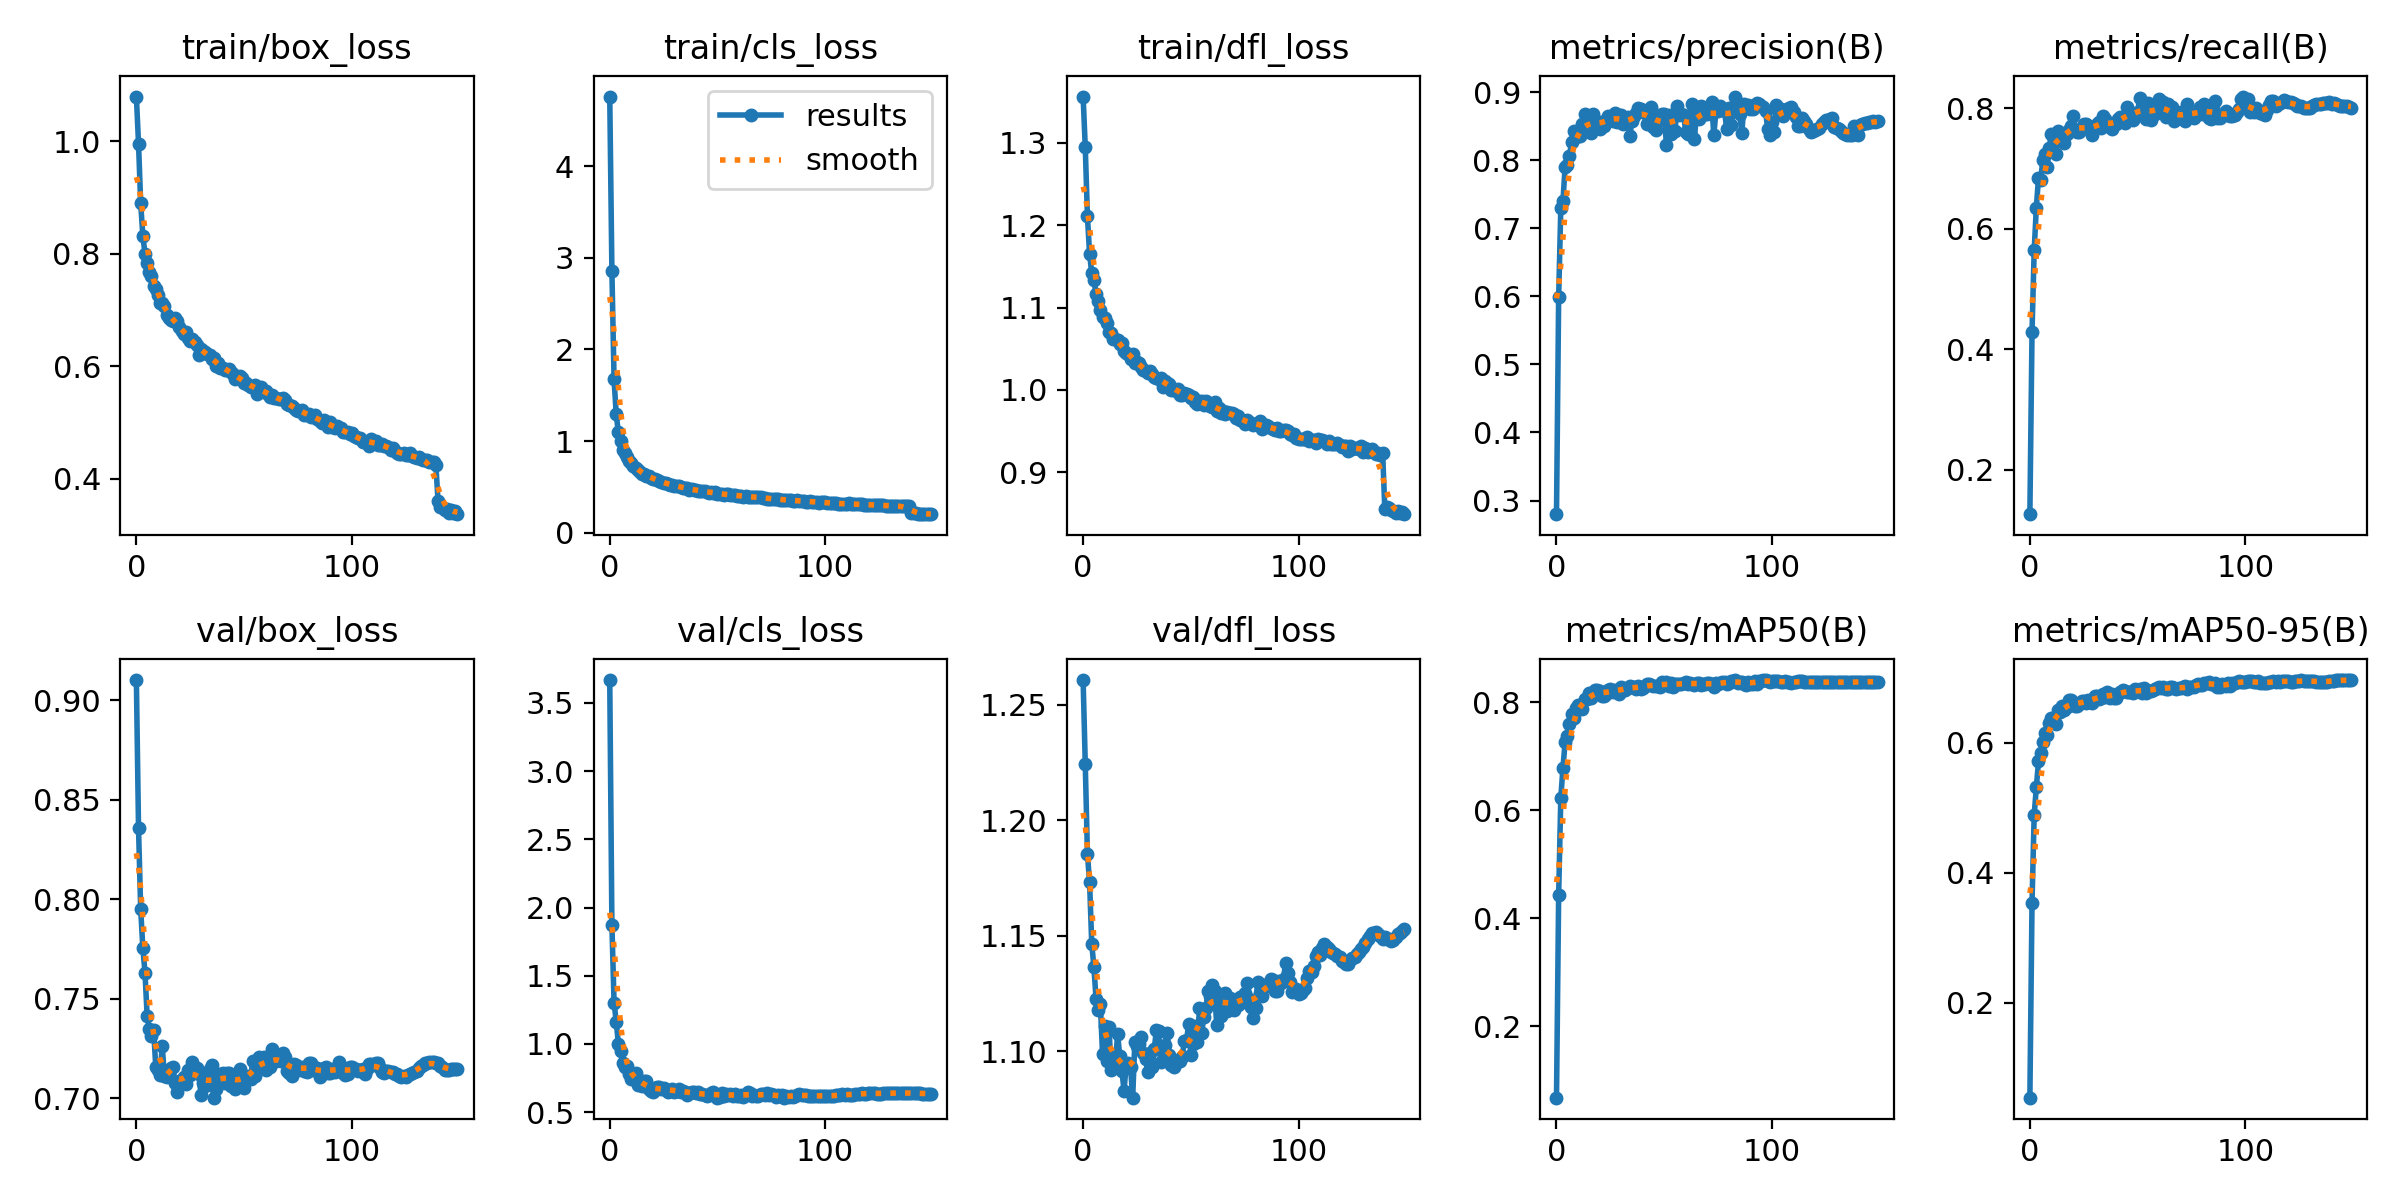

In [ ]:
from IPython.display import display, Image

display(Image(filename=base_path+'runs/detect/train/results.png'))


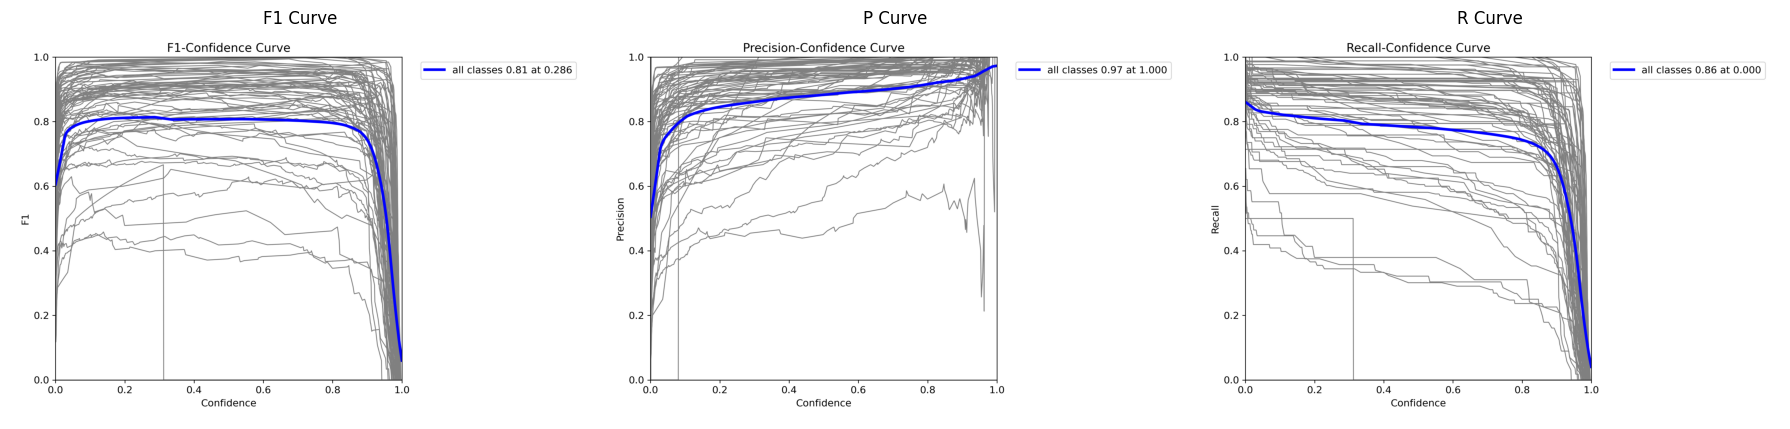

In [ ]:
from IPython.display import display, Image
import matplotlib.pyplot as plt
from PIL import Image

# 이미지 파일 경로
f1_curve_path = base_path+'runs/detect/train/F1_curve.png'
p_curve_path = base_path+'runs/detect/train/P_curve.png'
R_curve_path = base_path+'runs/detect/train/R_curve.png'

# 이미지 불러오기
f1_curve_img = Image.open(f1_curve_path)
p_curve_img = Image.open(p_curve_path)
R_curve_img = Image.open(R_curve_path)

# 이미지 크기 조정
# new_width = 1000
# new_height = 800
# # f1_curve_img = f1_curve_img.resize((new_width, new_height))
# # pr_curve_img = pr_curve_img.resize((new_width, new_height))

# 두 이미지 나란히 표시
fig, axes = plt.subplots(1, 3, figsize=(18, 12))
axes[0].imshow(f1_curve_img)
axes[0].set_title('F1 Curve')
axes[0].axis('off')

axes[1].imshow(p_curve_img)
axes[1].set_title('P Curve')
axes[1].axis('off')

axes[2].imshow(R_curve_img)
axes[2].set_title('R Curve')
axes[2].axis('off')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.tight_layout()
plt.show()

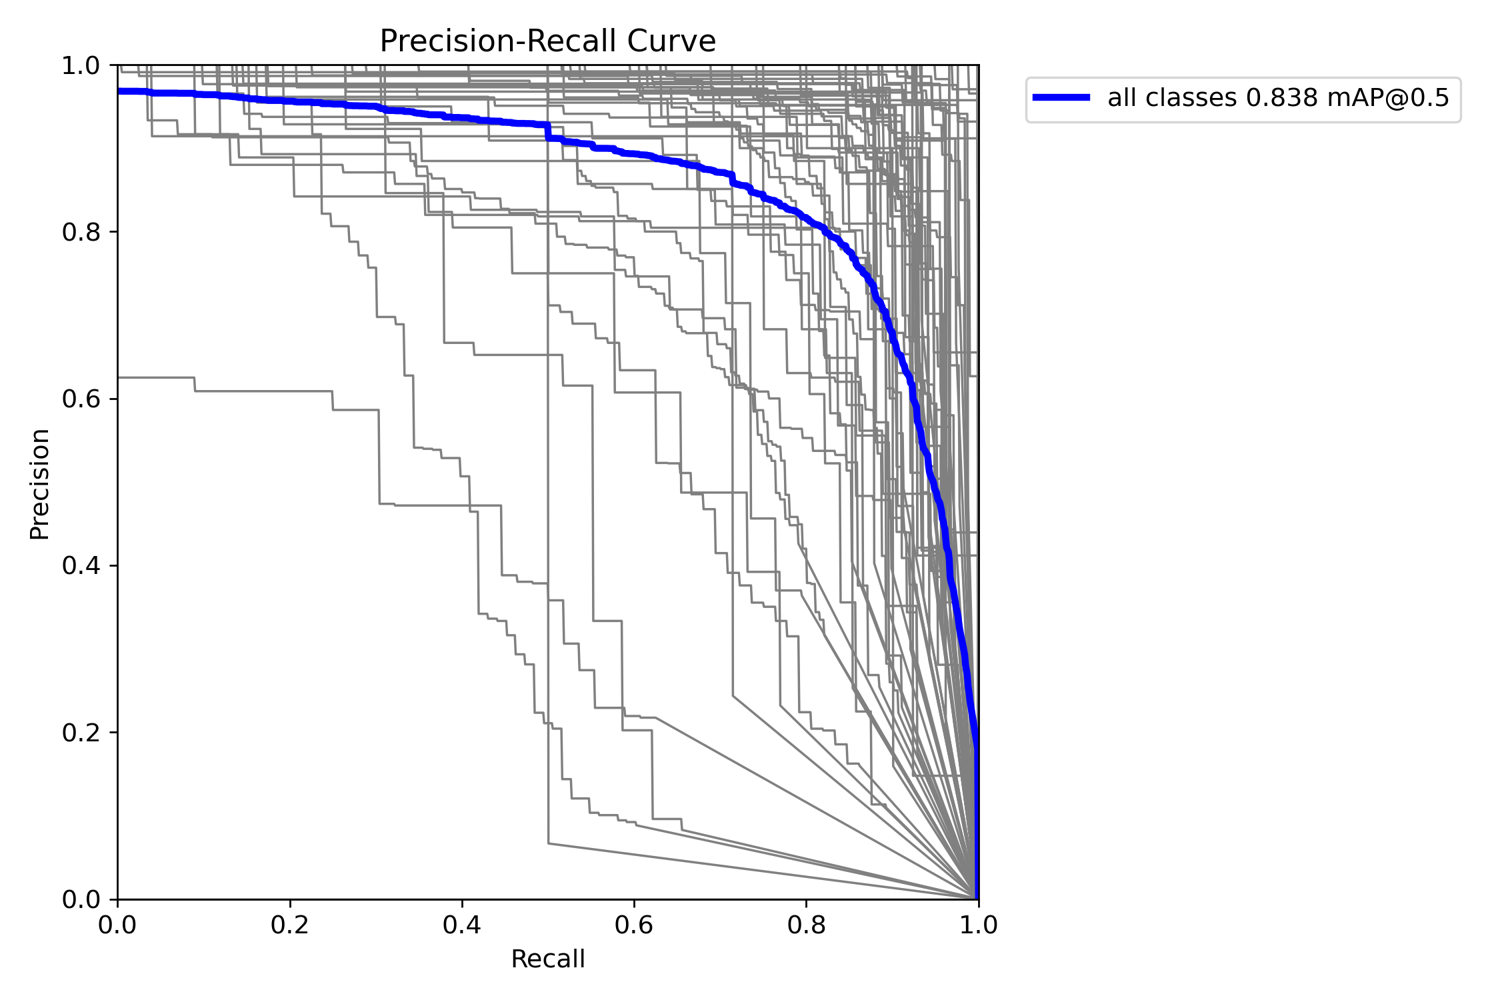

In [ ]:
image_path = 'runs/detect/train/PR_curve.png'
img = Image.open(image_path)

new_width = 1500
new_height = 1000
img = img.resize((new_width, new_height))


display(img)

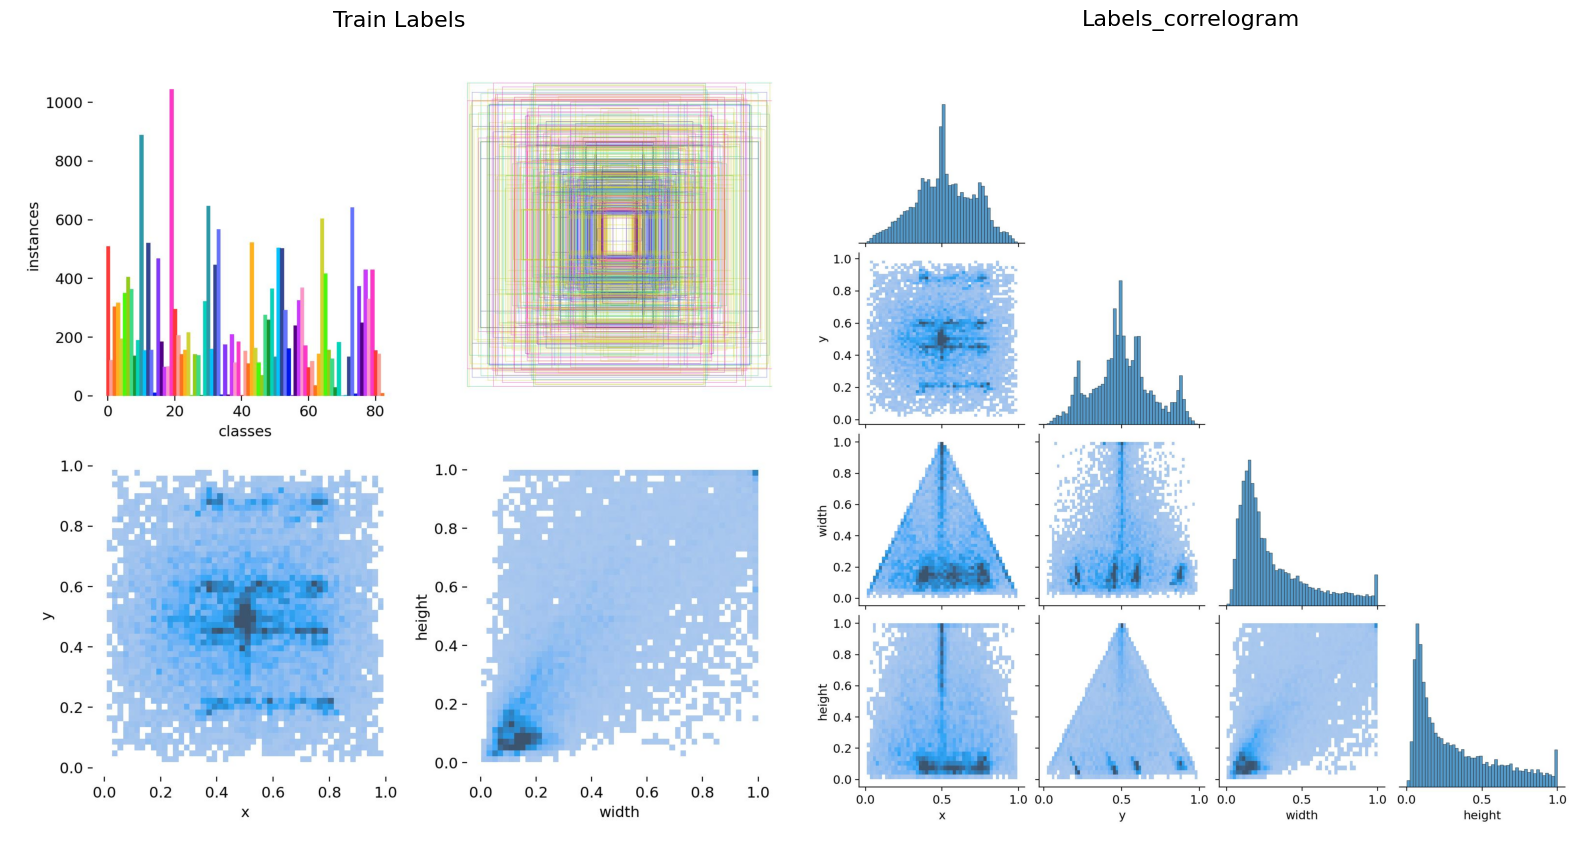

In [ ]:
image_labels_path = base_path+'runs/detect/train/labels.jpg'
image_labels_correlogram_path = base_path+'runs/detect/train/labels_correlogram.jpg'

# 이미지 불러오기
image_labels = Image.open(image_labels_path)
image_labels_correlogram = Image.open(image_labels_correlogram_path)

# 이미지 크기 조정
# new_width = 800
# new_height = 800
# image_labels = image_labels.resize((new_width, new_height))
# image_labels_correlogram = image_labels_correlogram.resize((new_width, new_height))

# 두 이미지 나란히 표시
fig, axes = plt.subplots(1, 2, figsize=(16, 10))
axes[0].imshow(image_labels)
axes[0].set_title('Train Labels\n', fontsize=16)
axes[0].axis('off')

axes[1].imshow(image_labels_correlogram)
axes[1].set_title('Labels_correlogram\n', fontsize=16)
axes[1].axis('off')


plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_images_side_by_side(pred_image_path, label_image_path):
    # Load predicted image and label image
    pred_img = Image.open(pred_image_path)
    label_img = Image.open(label_image_path)

    # Create a plot with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(18, 10))

    # Show the predicted image in the first subplot
    axes[0].imshow(pred_img)
    axes[0].set_title('Image Predict\n', fontsize=16)
    axes[0].axis('off')

    # Show the label image in the second subplot
    axes[1].imshow(label_img)
    axes[1].set_title('Image Labels\n', fontsize=16)
    axes[1].axis('off')

    # Display the plot
    plt.show()


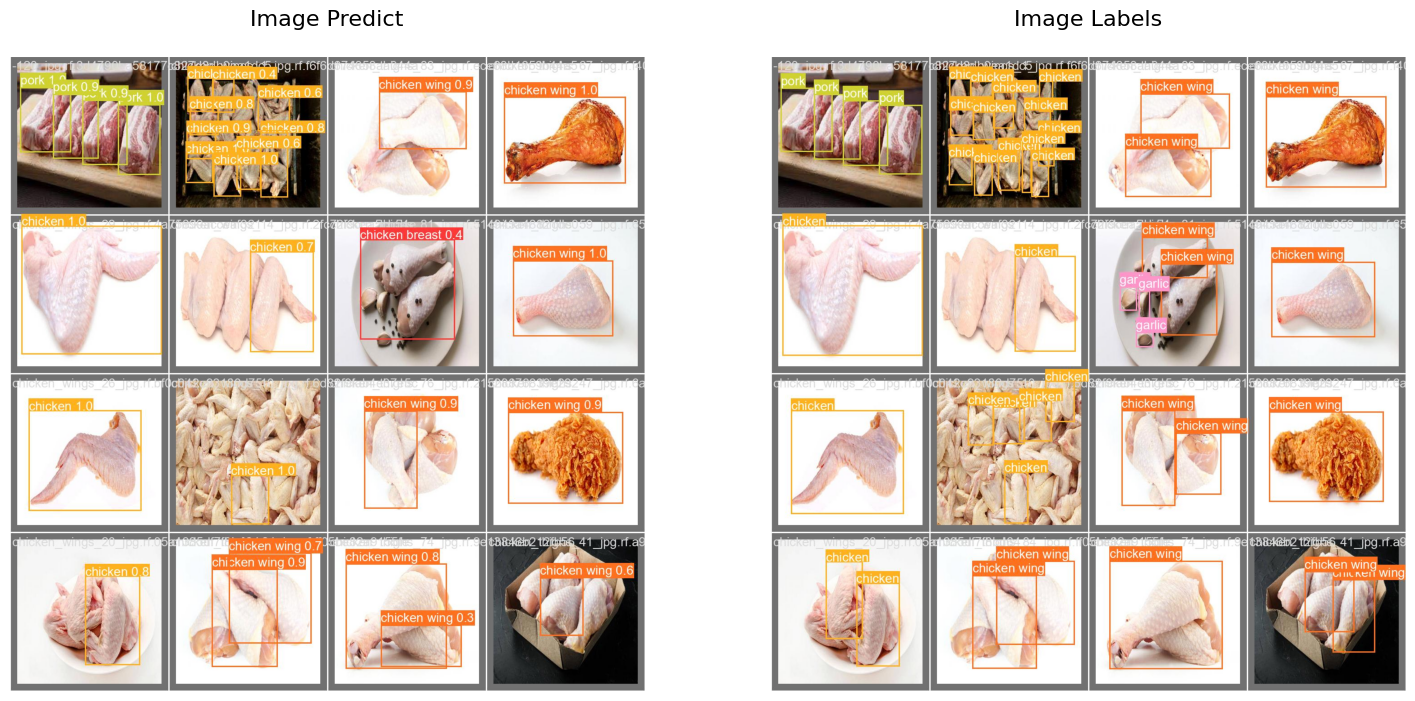

In [ ]:
val_pred = base_path + 'runs/detect/train/val_batch0_pred.jpg'
val_label = base_path + 'runs/detect/train/val_batch0_labels.jpg'
show_images_side_by_side(val_pred, val_label)

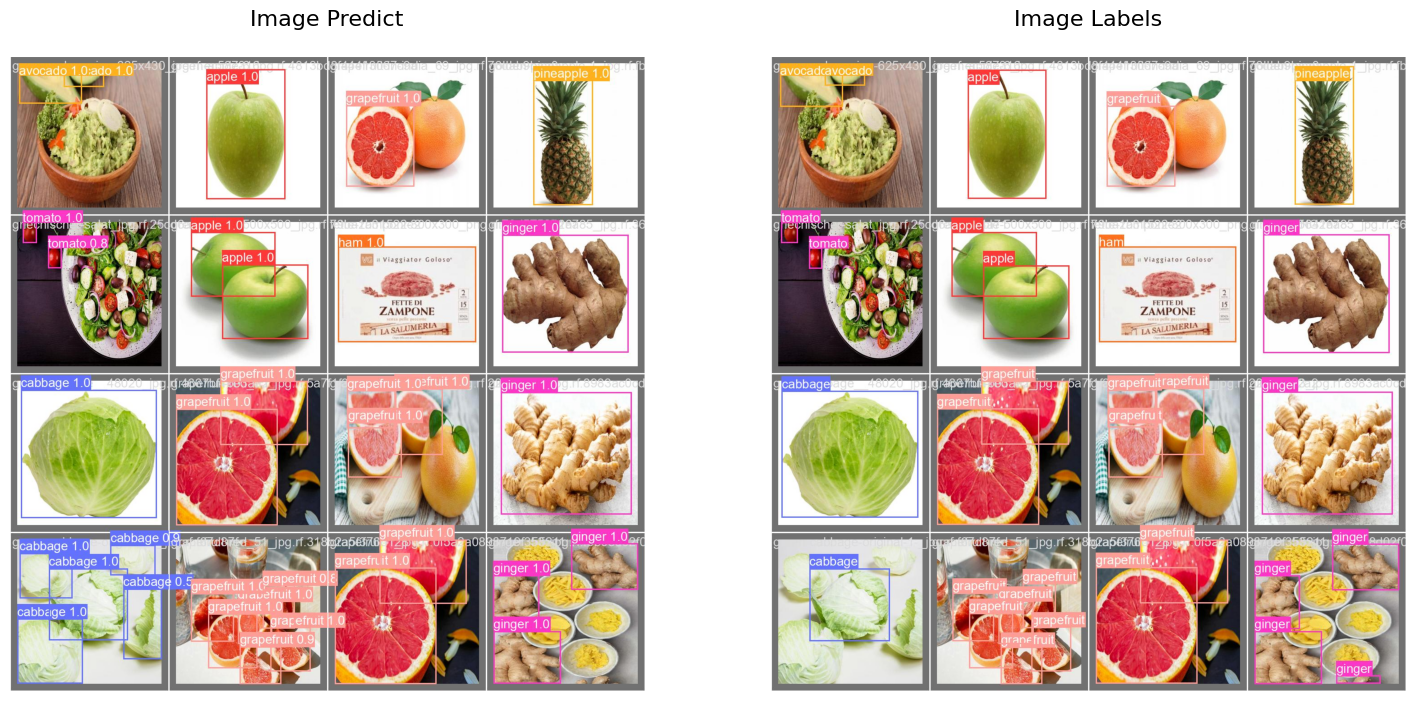

In [ ]:
val_pred = base_path + 'runs/detect/train/val_batch1_pred.jpg'
val_label = base_path + 'runs/detect/train/val_batch1_labels.jpg'
show_images_side_by_side(val_pred, val_label)

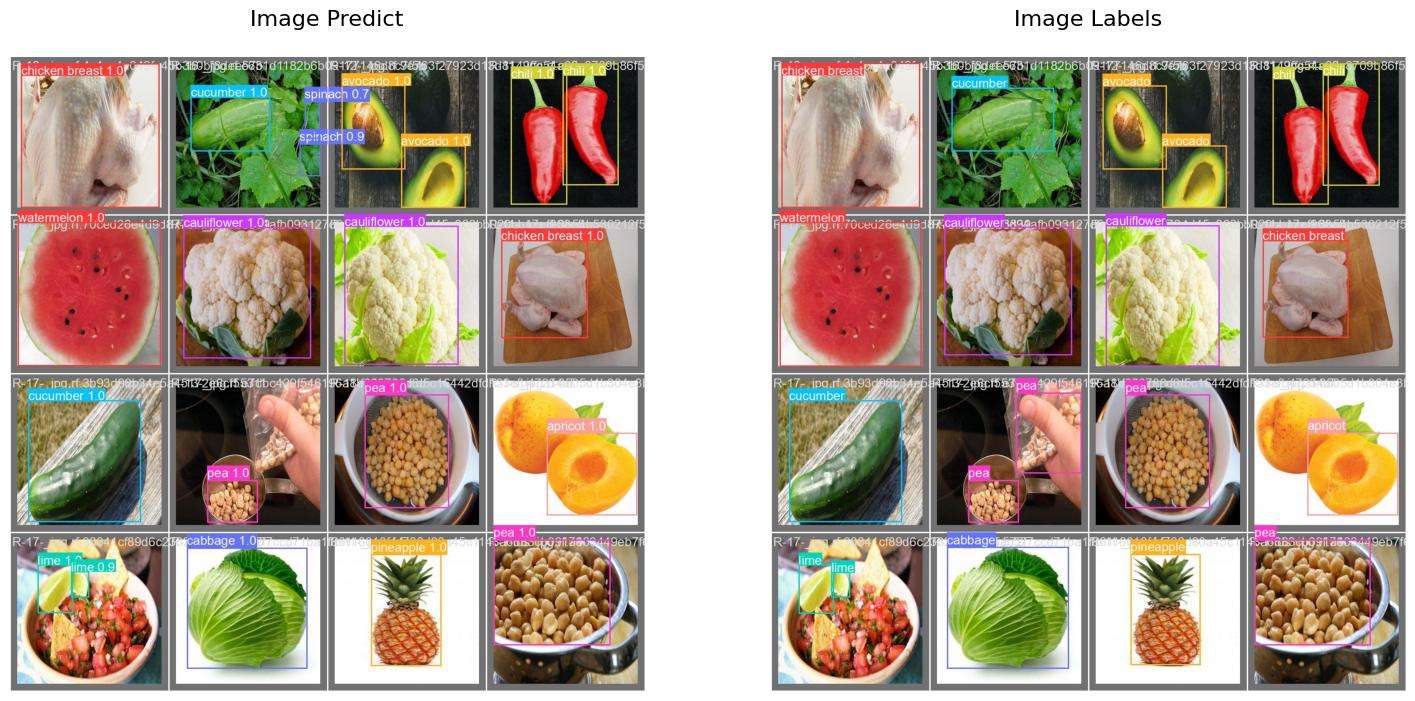

In [ ]:
val_pred = base_path + 'runs/detect/train/val_batch2_pred.jpg'
val_label = base_path + 'runs/detect/train/val_batch2_labels.jpg'
show_images_side_by_side(val_pred, val_label)


### 테스트 데이터 예측

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def visualize_predicted_images(predict_folder, image_size=(100, 100)):
    predict_images = os.listdir(predict_folder)

    num_images = min(len(predict_images), 16)
    num_rows = (num_images + 3) // 4
    fig, axes = plt.subplots(num_rows, 4, figsize=(14, 14))

    for i, image_name in enumerate(predict_images):
        if i >= num_images:
            break

        predict_image_path = os.path.join(predict_folder, image_name)

        predict_image = Image.open(predict_image_path).resize(image_size)

        row_idx = i // 4
        col_idx = i % 4
        axes[row_idx, col_idx].imshow(predict_image)
        axes[row_idx, col_idx].set_title(f'Image {i+1}')
        axes[row_idx, col_idx].axis('off')

    plt.suptitle('Model Predictions on Test Images\n', fontsize=16)
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
predict_folder = base_path+'runs/detect/predict/'
image_size = (800, 800)
visualize_predicted_images(predict_folder, image_size=image_size)


Output hidden; open in https://colab.research.google.com to view.

### 비디오

In [ ]:
!yolo task=detect mode=predict model=./runs/detect/train3/weights/best.pt source=/kaggle/input/video conf=0.4 save=True



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [ ]:
import zipfile

# 폴더 경로와 압축 파일 이름 설정
folder_path = '/kaggle/working/runs/detect/predict4'
zip_file_name = 'predict_video.zip'

# 폴더를 압축
with zipfile.ZipFile(zip_file_name, 'w') as zipf:
    for foldername, subfolders, filenames in os.walk(folder_path):
        for filename in filenames:
            file_path = os.path.join(foldername, filename)
            zipf.write(file_path, os.path.relpath(file_path, folder_path))

# 압축 파일 다운로드
from IPython.display import FileLink
FileLink(zip_file_name)

/kaggle/working/predict_video.zip

In [ ]:
success = model.export(format="onnx")  # export the model to ONNX format


Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 268 layers, 68203497 parameters, 0 gradients

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 320, 320) BCHW and output shape(s) (1, 87, 2100) (130.5 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 107.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 11.3s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.0 opset 17...


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success ✅ 24.4s, saved as 'runs/detect/train/weights/best.onnx' (260.3 MB)

Export complete (34.0s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=320 
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=320 data=None 
Visualize:       https://netron.app


In [ ]:
def fitness(x):
     # Model fitness as a weighted combination of metrics
     w = [0.0, 0.0, 0.1, 0.9]  # weights for [P, R, mAP@0.5, mAP@0.5:0.95]
     return (x[:, :4] * w).sum(1)

In [ ]:
!pip install sagemaker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 854.4/854.4 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.1 MB/s eta 0:00:00
  Created wheel for sagemaker: filename=sagemaker-2.173.0-py2.py3-none-any.whl size=1163280 sha256=9ddc38c1c0d9eab3cdeefe13ad907c8538c6d1e0e7db31a1cc6ac011558bb64b
  Stored in directory: /root/.cache/pip/wheels/cc/23/21/6857de3905209ac2dbbe974e18a5654d28cd247f4223ff6bff
Successfully built sagemaker
  Attempting

In [ ]:
import sagemaker

from sagemaker import get_execution_role
from sagemaker.estimator import Estimator
from sagemaker.pytorch import PyTorch
from sagemaker.tuner import CategoricalParameter, ContinuousParameter
from sagemaker.tuner import HyperparameterTuner, HyperbandStrategyConfig, StrategyConfig
from sagemaker.estimator import Estimator

In [ ]:
sagemaker_session = sagemaker.Session()
role = get_execution_role()
# setting the metric definitions for the YOLO model

metric_definitions=[
    {
        "Name": "precision",
        "Regex": "YOLO Metric metrics/precision\(B\): (.*)"
    },
    {
        "Name": "recall",
        "Regex": "YOLO Metric metrics/recall\(B\): (.*)"
    },
    {
        "Name": "mAP50",
        "Regex": "YOLO Metric metrics/mAP50\(B\): (.*)"
    },
    {
        "Name": "mAP50-95",
        "Regex": "YOLO Metric metrics/mAP50-95\(B\): (.*)"
    },
    {
        "Name": "box_loss",
        "Regex": "YOLO Metric val/box_loss: (.*)"
    },
    {
        "Name": "cls_loss",
        "Regex": "YOLO Metric val/cls_loss: (.*)"
    },
    {
        "Name": "dfl_loss",
        "Regex": "YOLO Metric val/dfl_loss: (.*)"
    }
]

estimator = PyTorch(
    entry_point="train.py",
    role=role,
    image_uri='your/image',  # your image
    source_dir="./src",
    instance_count=1,
    instance_type='ml.g4dn.xlarge',
    framework_version="1.12.1",
    py_version="py38",
    sagemaker_session=sagemaker_session,
    hyperparameters={},
    use_spot_instances=True,
    input_mode='File',  # FastFile causes a issue with writing label cache
    debugger_hook_config=False,
    max_wait=360000+3600,
    max_run=360000,
    output_path='path/to/output',
    enable_sagemaker_metrics=True,
    metric_definitions=metric_definitions,
)

ValueError: ignored

In [ ]:
import sys
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--epochs', help='number of training epochs')
parser.add_argument('--optimizer', help='optimizer to use')
parser.add_argument('--lr0', help='initial learning rate')
parser.add_argument('--lrf', help='final learning rate')
parser.add_argument('--momentum', help='momentum')
parser.add_argument('--weight_decay', help='optimizer weight decay')
args = parser.parse_args()

print('---------------Debug injected environment and arguments--------------------')
print(sys.argv)
print(os.environ)
print('---------------End debug----------------------')


usage: ipykernel_launcher.py [-h] [--epochs EPOCHS] [--optimizer OPTIMIZER]
                             [--lr0 LR0] [--lrf LRF] [--momentum MOMENTUM]
                             [--weight_decay WEIGHT_DECAY]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-44f34b81-172d-48c9-99c9-e9b2845f4a5f.json


SystemExit: ignored